# FitzHugh Naguno

xxxxx

$$\left\{
\begin{array}{l}
\dot{x} = x - x^3 - y + I(t)
\\
\dot{y} = \epsilon (x - \gamma y)
\end{array}
\right.$$

In [1]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\ode_to_odes


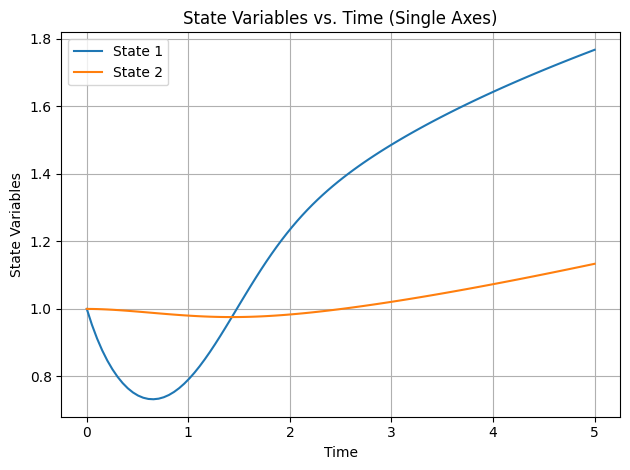

In [2]:
#  Imports
import numpy as np
from scipy.integrate import solve_ivp
from ode_helpers import state_plotter

#  Define derivative function
def f(t, y, c):
    ydot = [y[0]-y[0]**3 - y[1] + t, 
            c[0]*(y[0]-c[1]*y[1])]
    return ydot

#  Define time spans, initial values, and constants
tspan = np.linspace(0, 5, 100)
yinit = [1, 1]
      
epsilon = .1
gamma = 1
c = (epsilon, gamma)
                  

#  Solve differential equation
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)
#  Plot states
state_plotter(sol.t, sol.y)